In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df= pd.read_csv("C:/Users/ritik/Dropbox/assignment q&A/FinalProject/Hotel_Reviews.csv")
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [8]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [9]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [10]:
print(df.isnull().sum())

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64


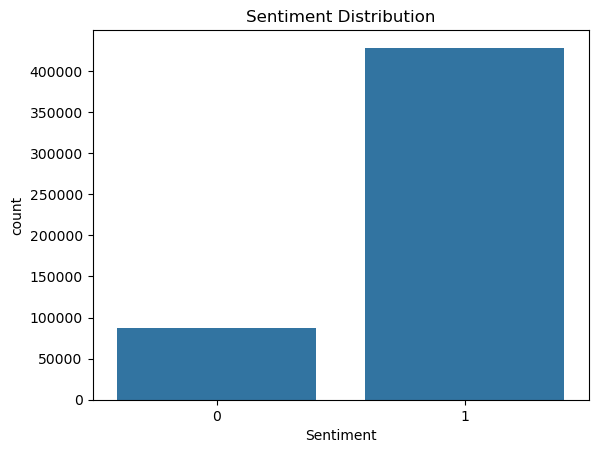

In [11]:
# Combine Positive and Negative reviews into a single text column
df['Full_Review'] = df['Positive_Review'] + " " + df['Negative_Review']

# Create a 'Sentiment' column: Positive if Reviewer_Score > 7, Negative otherwise
df['Sentiment'] = np.where(df['Reviewer_Score'] > 7, 1, 0)

# Check the balance of Sentiments
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [12]:
# Text preprocessing function
def clean_text(text):
    import re
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text
df['Full_Review'] = df['Full_Review'].apply(clean_text)

### Wordcloud of all reviews

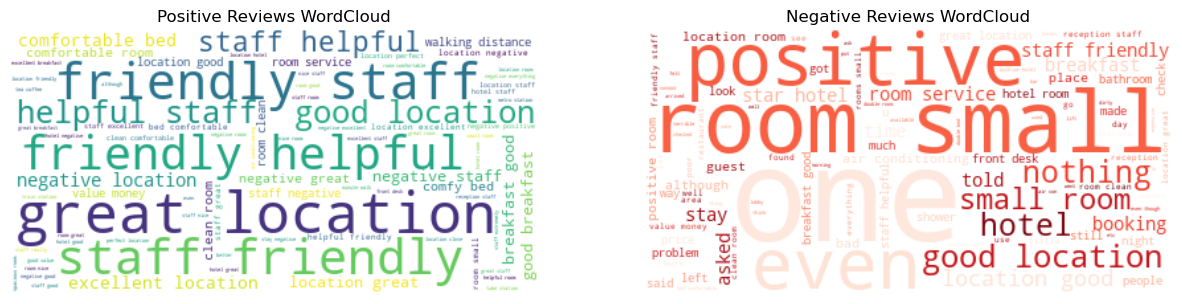

In [13]:
positive_reviews = " ".join(df[df['Sentiment'] == 1]['Full_Review'])
negative_reviews = " ".join(df[df['Sentiment'] == 0]['Full_Review'])

plt.figure(figsize=(15, 7))

# Positive reviews WordCloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(background_color='white', max_words=100).generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Reviews WordCloud")
plt.axis("off")

# Negative reviews WordCloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(background_color='white', max_words=100, colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Reviews WordCloud")
plt.axis("off")

plt.show()

In [14]:
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Full_Review'])  # Keep the sparse matrix form
y = df['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying Naive Bayes Classifier

In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.63      0.58     17596
           1       0.92      0.89      0.91     85552

    accuracy                           0.85    103148
   macro avg       0.73      0.76      0.74    103148
weighted avg       0.86      0.85      0.85    103148

Accuracy: 0.8465505875053322


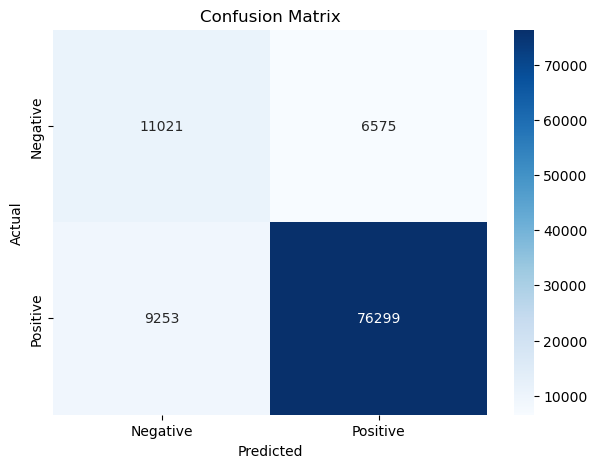

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Get the prediction probabilities
review_probs = model.predict_proba(X_test)

# Define "confidence" as the maximum probability per review
confidence_scores = np.max(review_probs, axis=1)

# Assign a star rating (1 to 5) based on confidence thresholds
df_test = pd.DataFrame({'Review': df['Full_Review'][y_test.index], 'Sentiment': y_test, 'Confidence': confidence_scores})
df_test['Rating'] = pd.cut(df_test['Confidence'], bins=[0, 0.5, 0.7, 0.85, 0.95, 1], labels=[1, 2, 3, 4, 5])

# Preview some results
print(df_test.head(10))

                                                   Review  Sentiment  \
488440  hotel great clean friendly staff free breakfas...          1   
274649             positive tissue paper box present room          1   
374688                     nice welcoming service pillows          1   
404352  everything including nice upgrade hotel revamp...          1   
451596            lovely hotel v welcoming staff negative          1   
302161  location perfect lot time want look city centr...          1   
317079  location price cost much breakfast included ro...          1   
13963   comphy bed upgraded executive room nespresso m...          1   
159785  centrality proximity destination pity two days...          1   
195089  like anything stay chance change cancel would ...          0   

        Confidence Rating  
488440    0.999999      5  
274649    0.974430      5  
374688    0.972700      5  
404352    0.999983      5  
451596    0.999428      5  
302161    0.987653      5  
317079    0

C:\Users\ritik\AppData\Local\Temp\ipykernel_9548\3473264393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test, x='Rating', palette='viridis')


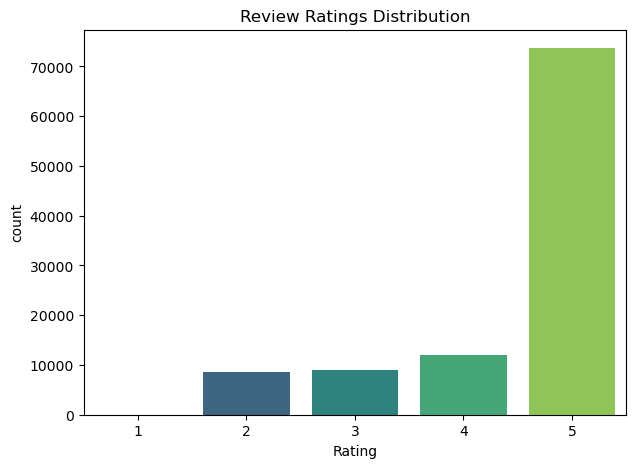

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_test, x='Rating', palette='viridis')
plt.title("Review Ratings Distribution")
plt.show()

#### Class 0 (Negative reviews): Precision: 54%, Recall: 63%, F1-score: 58% — Decent recall but lower precision, leading to missed negatives.
#### Class 1 (Positive reviews): Precision: 92%, Recall: 89%, F1-score: 91% — High performance, showing the model strongly favors positive predictions.
#### Imbalance issue: The model skews toward positive reviews due to class imbalance, reflected in the macro avg (73% precision, 76% recall)
#### and weighted avg (85% accuracy), which leans toward the majority class.
### Although Naive Bayes works well with text data, but we also seen that the data is imbalanced, lets like Logical Regression and Random Forest

### Using Logical Regression,

In [19]:
print(df.head())
print(df['Sentiment'].value_counts())

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original Class Distribution:", np.bincount(y_train))
print("Resampled Class Distribution:", np.bincount(y_train_res))

Original Class Distribution: [ 69666 342924]
Resampled Class Distribution: [342924 342924]


In [22]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [23]:
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.55     17596
           1       0.93      0.82      0.87     85552

    accuracy                           0.80    103148
   macro avg       0.69      0.77      0.71    103148
weighted avg       0.85      0.80      0.82    103148

Accuracy: 0.8034959475704813


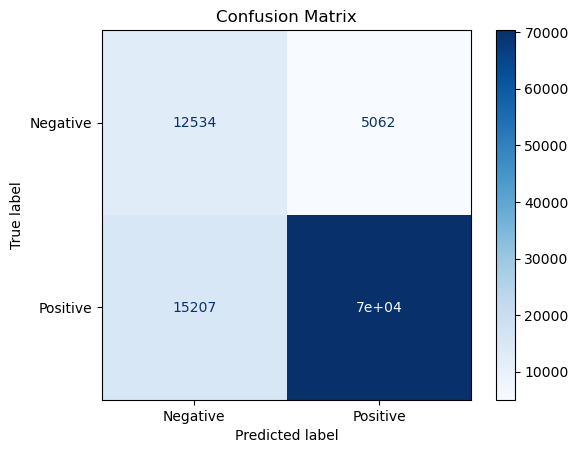

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

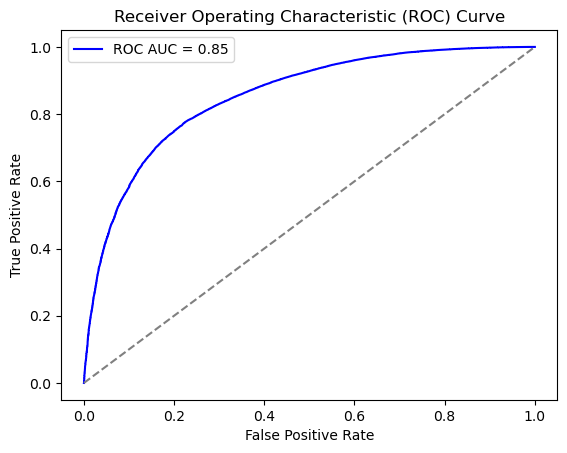

In [25]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

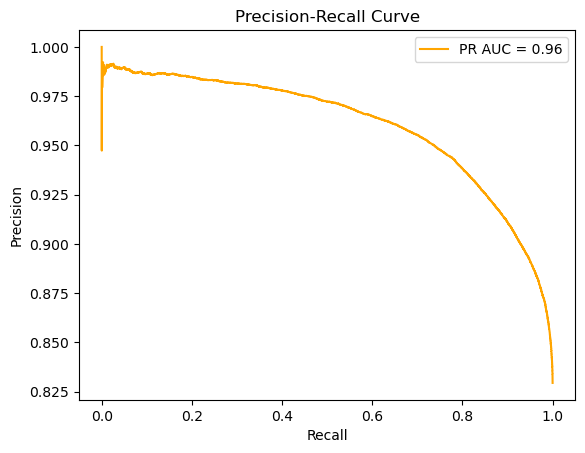

In [26]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='orange', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

C:\Users\ritik\AppData\Local\Temp\ipykernel_9548\3686433205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features['Feature'], x=top_features['Importance'], palette='viridis')


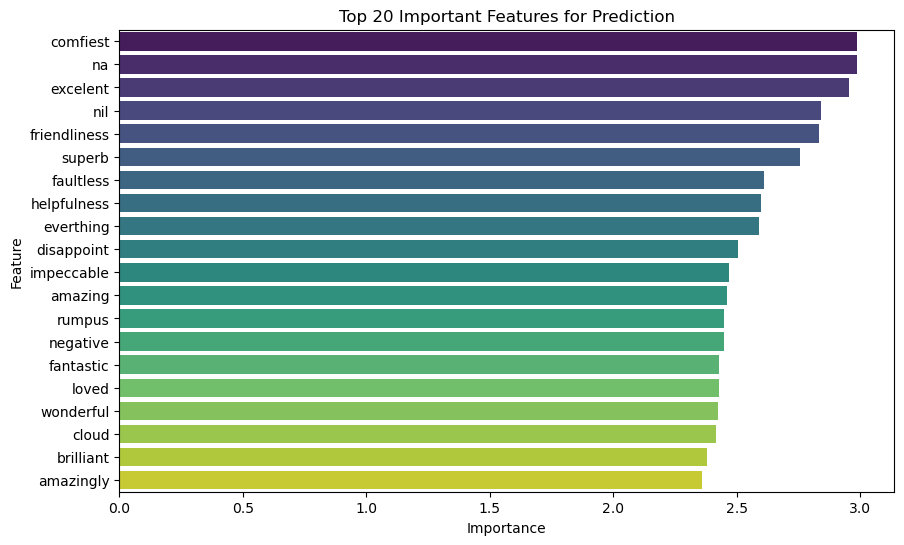

In [27]:
feature_importance = pd.DataFrame({
    'Feature': vectorizer.get_feature_names_out(),
    'Importance': model.coef_[0]
})

top_features = feature_importance.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_features['Feature'], x=top_features['Importance'], palette='viridis')
plt.title('Top 20 Important Features for Prediction')
plt.show()

#### Lets Tune the model using HyperParameter Tuning

In [28]:
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

In [29]:
log_reg = LogisticRegression(max_iter=1000)

In [30]:
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=20,  # Controls how many combinations to try
    cv=3,       # 3-fold CV is faster
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 200, 300],
                                        'solver': ['lbfgs', 'liblinear']},
                   random_state=42, scoring='accuracy', verbose=2)

In [31]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Model:", random_search.best_estimator_)

Best Hyperparameters: {'solver': 'liblinear', 'max_iter': 300, 'C': 0.08858667904100823}
Best Model: LogisticRegression(C=0.08858667904100823, max_iter=300, solver='liblinear')


In [32]:
best_model = random_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.8793287315313918
Precision: 0.8950383123128965
Recall: 0.9680311389564241
F1 Score: 0.9301048399323903


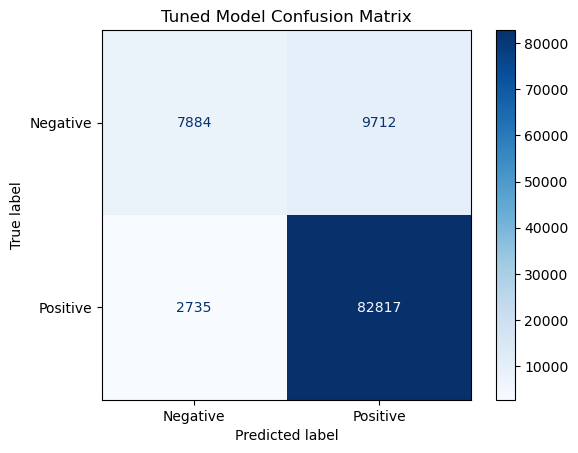

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['Negative', 'Positive'])
disp_tuned.plot(cmap='Blues')

plt.title('Tuned Model Confusion Matrix')
plt.show()

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Display the best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

# Confusion matrix visualization
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Baseline Logistic Regression
baseline_log_reg = LogisticRegression(max_iter=1000)
baseline_log_reg.fit(X_train, y_train)
y_pred_baseline = baseline_log_reg.predict(X_test)

# Evaluate baseline
baseline_results = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1 Score': f1_score(y_test, y_pred_baseline)
}

print("Baseline Logistic Regression Performance:")
print(baseline_results)

Baseline Logistic Regression Performance:
{'Accuracy': 0.8802691278551208, 'Precision': 0.8976122191804632, 'Recall': 0.9658102674396858, 'F1 Score': 0.9304632778541023}



Naive Bayes Performance:
{'Accuracy': 0.8465505875053322, 'Precision': 0.9206626927625069, 'Recall': 0.891843557134842, 'F1 Score': 0.9060240105446902}


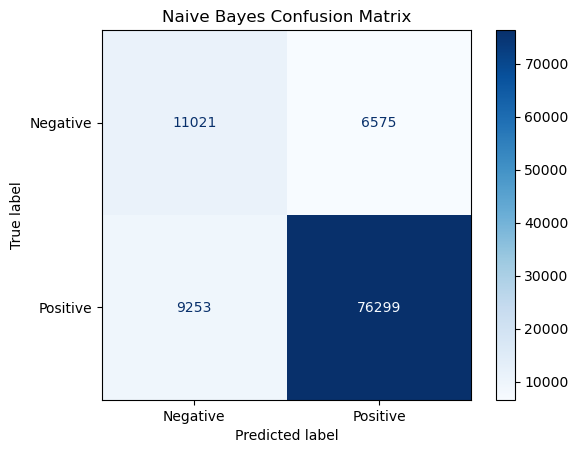

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Train Multinomial Naive Bayes (works with sparse matrices)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes
nb_results = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1 Score': f1_score(y_test, y_pred_nb)
}

print("\nNaive Bayes Performance:")
print(nb_results)

# Confusion Matrix Visualization
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Negative', 'Positive'])
disp_nb.plot(cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [39]:
# Get the best RandomizedSearchCV model
random_best_model = random_search.best_estimator_
y_pred_random = random_best_model.predict(X_test)

# Evaluate RandomizedSearchCV model
random_results = {
    'Accuracy': accuracy_score(y_test, y_pred_random),
    'Precision': precision_score(y_test, y_pred_random),
    'Recall': recall_score(y_test, y_pred_random),
    'F1 Score': f1_score(y_test, y_pred_random)
}

print("\nRandomizedSearchCV Tuned Model Performance:")
print(random_results)


RandomizedSearchCV Tuned Model Performance:
{'Accuracy': 0.8793287315313918, 'Precision': 0.8950383123128965, 'Recall': 0.9680311389564241, 'F1 Score': 0.9301048399323903}


In [40]:
# Compare results in a DataFrame
comparison_df = pd.DataFrame(
    [baseline_results, nb_results, random_results],
    index=['Baseline Logistic Regression', 'Naive Bayes', 'RandomizedSearchCV Model']
)

print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                              Accuracy  Precision    Recall  F1 Score
Baseline Logistic Regression  0.880269   0.897612  0.965810  0.930463
Naive Bayes                   0.846551   0.920663  0.891844  0.906024
RandomizedSearchCV Model      0.879329   0.895038  0.968031  0.930105


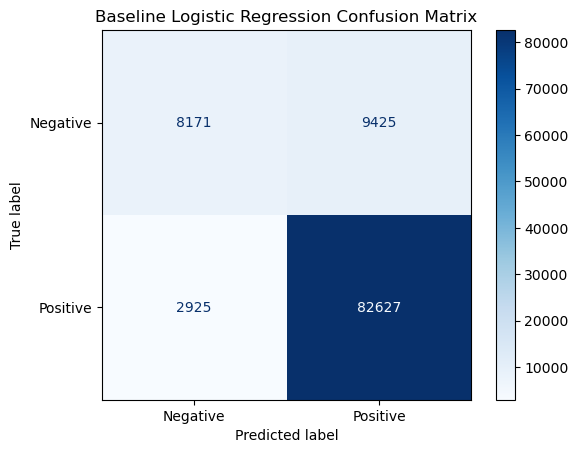

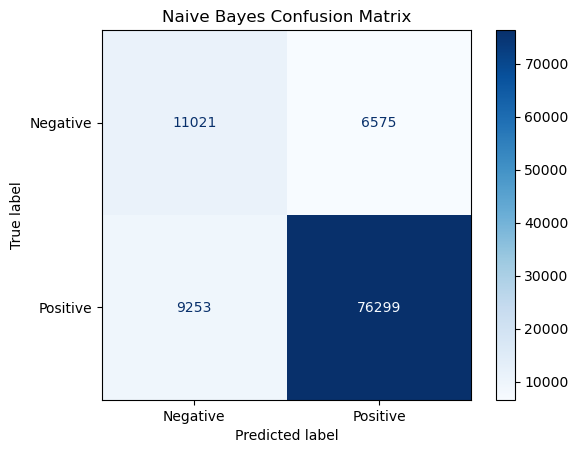

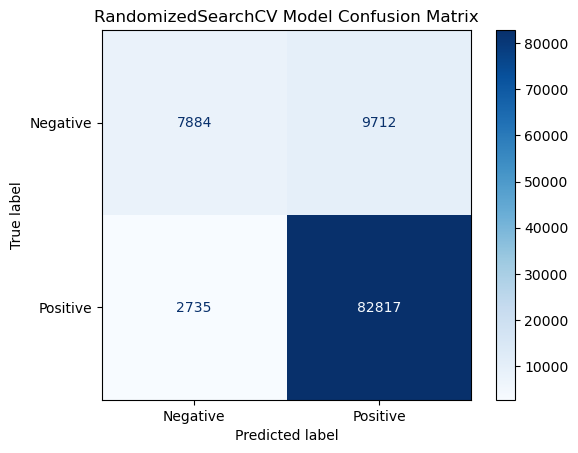

In [41]:
# Define a function for displaying confusion matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_baseline, "Baseline Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_random, "RandomizedSearchCV Model Confusion Matrix")

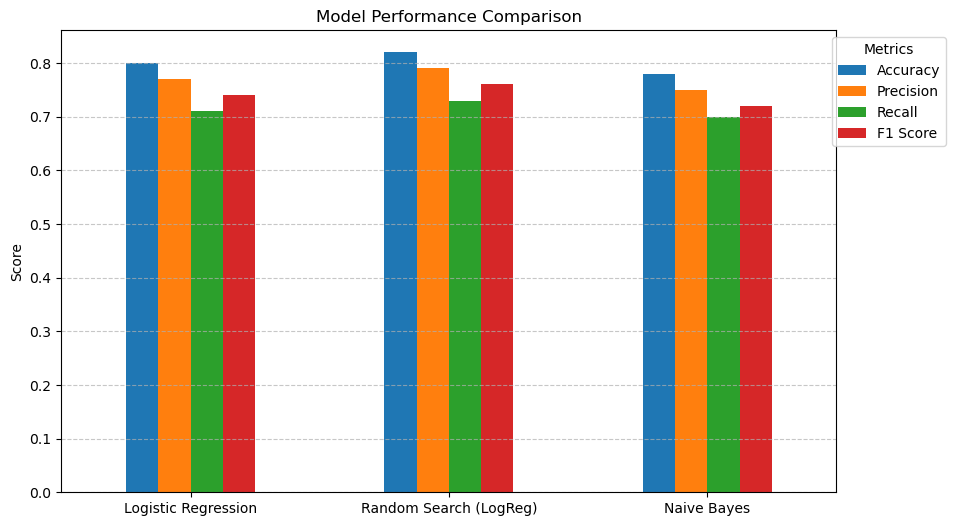

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming results from each model are stored in dictionaries like:
log_reg_results = {'Accuracy': 0.80, 'Precision': 0.77, 'Recall': 0.71, 'F1 Score': 0.74}
random_search_results = {'Accuracy': 0.82, 'Precision': 0.79, 'Recall': 0.73, 'F1 Score': 0.76}
nb_results = {'Accuracy': 0.78, 'Precision': 0.75, 'Recall': 0.70, 'F1 Score': 0.72}

# Combine results into a DataFrame
results_df = pd.DataFrame([log_reg_results, random_search_results, nb_results],
                          index=['Logistic Regression', 'Random Search (LogReg)', 'Naive Bayes'])

# Plot
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()